# Name: Shrook Ehab Attia
# Group No.: 1
# AI - Nasr City Intake 2

## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [39]:
x_points = np.linspace(0,20)
print(x_points)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [40]:
a = -2
b = 1
y_points = np.add(np.multiply(a, x_points), b)
print(y_points)

[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Plot your data points. 

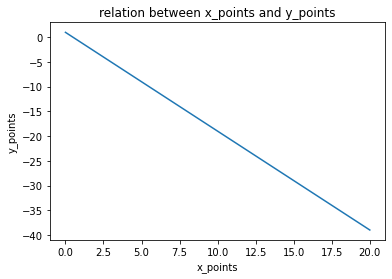

In [41]:
plt.plot(x_points, y_points)
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [42]:
def GDBatch(x_points, y_points, learning_rate, maxNumOfIteration):
    m = len(x_points)
    theta = [0,0]
    loss = []
    thetas0 = []
    thetas1 = []
    GDthetas = [0,0]
    hyposesis = []
    iteration = 1
    numIter = []
    for i in range(maxNumOfIteration):
        print('==================iteration{}==================='.format(iteration))
        hThetaX = np.add(theta[0], np.multiply(theta[1], x_points))
        hyposesis.append(hThetaX)
        numIter.append(i)
        #JTheta = (1 / 2 * m) * np.sum(np.power(np.subtract(hThetaX, y_points), 2))
        JTheta = (1 / (2 * m)) * np.sum(np.subtract(hThetaX, y_points) **2)
        loss.append(JTheta)
        GDTheta0 = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), 1))
        GDTheta1 = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), x_points))
        thetas0.append(theta[0])
        thetas1.append(theta[1])
        theta[0] = theta[0] - learning_rate * GDTheta0
        theta[1] = theta[1] - learning_rate * GDTheta1
        GDthetas[0] = GDTheta0
        GDthetas[1] = GDTheta1
        print('error using MSE = ', JTheta)
        print('New Theta = ', theta)
        print('')
        iteration = iteration + 1
        #norm = L2Norm(gradTheta)
        #norm = np.absolute(np.dot(GDTheta0, GDTheta1))
        norm = np.linalg.norm(GDthetas)
        if i > 0:
            if norm < 0.001:
                break
            if np.absolute(loss[i] - loss[i-1]) < 0.001:
                optimum = hThetaX
                break
#print('loss is: ', loss)
#print('thetas is: ', theta)
    return [thetas0, thetas1, loss, hyposesis, optimum, numIter]

In [43]:
learning_rate = 0.001
maxNumOfIteration = 1000
thetas0, thetas1, loss, hyposesis, optimum, numIter = GDBatch(x_points, y_points, learning_rate, maxNumOfIteration)

print('thetas0: ', thetas0)
print('')
print('thetas1: ', thetas1)
print('')
print('loss: ', loss)
print('')
print('hyposesis: ', hyposesis)
print('')
print('optimum: ', optimum)

==================iteration1===================
error using MSE =  249.88775510204087
New Theta =  [-0.019, -0.2593877551020409]

==================iteration2===================
error using MSE =  186.82544901821942
New Theta =  [-0.0353871224489796, -0.48364756768013334]

==================iteration3===================
error using MSE =  139.68837516021625
New Theta =  [-0.04951525964972929, -0.6775370852987277]

==================iteration4===================
error using MSE =  104.45490187382671
New Theta =  [-0.06169037353709228, -0.8451695906007691]

==================iteration5===================
error using MSE =  78.11898842228952
New Theta =  [-0.0721769872575475, -0.9901012726212131]

==================iteration6===================
error using MSE =  58.43371572199665
New Theta =  [-0.08120379754407782, -1.1154066782731273]

==================iteration7===================
error using MSE =  43.719583789283334
New Theta =  [-0.08896852696380247, -1.2237439448568164]

=========

In [44]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.9975950054190024

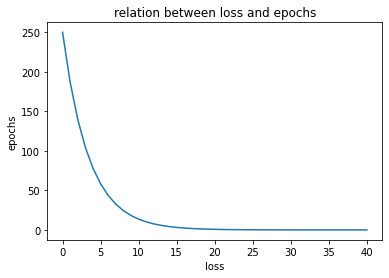

In [45]:
plt.plot(loss)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

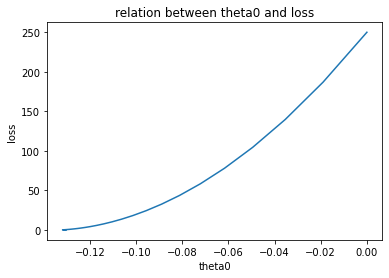

In [46]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

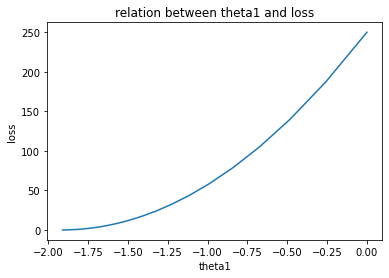

In [47]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

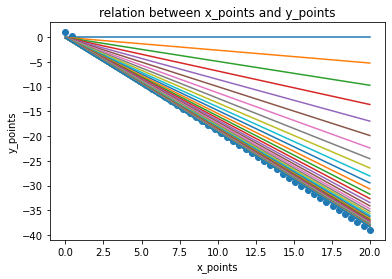

In [48]:
plt.scatter(x_points, y_points)
for i in hyposesis:
    z = np.polyfit(x_points, i, 1)
    p = np.poly1d(z)
    plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

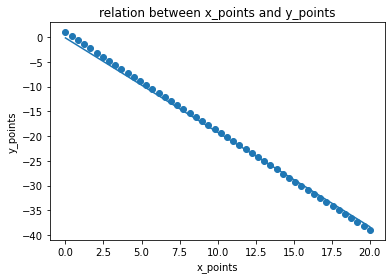

In [49]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

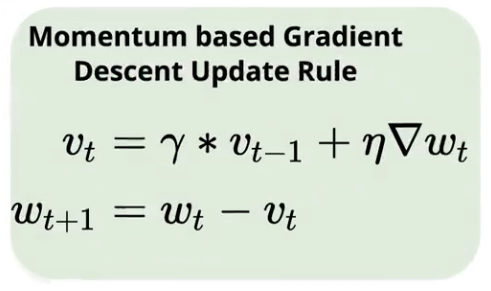

#### γ takes values between 0 and 1.
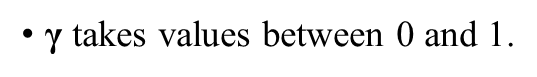

In [50]:
def MomentumBatch(x_points, y_points, gamma, learning_rate, maxNumOfIteration):
    m = len(x_points)
    theta = [0,0]
    vt = [0,0]
    loss = []
    thetas0 = []
    thetas1 = []
    vts0 = []
    vts1 = []
    GDtheta = [0,0]
    hyposesis = []
    iteration = 1
    numIter = []
    for i in range(maxNumOfIteration):
        print('==================iteration{}==================='.format(iteration))
        hThetaX = np.add(theta[0], np.multiply(theta[1], x_points))
        hyposesis.append(hThetaX)
        numIter.append(i)
        #JTheta = (1 / 2 * m) * np.sum(np.power(np.subtract(hThetaX, y_points), 2))
        JTheta = (1 / (2 * m)) * np.sum(np.subtract(hThetaX, y_points) **2)
        loss.append(JTheta)
        GDtheta[0] = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), 1))
        GDtheta[1] = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), x_points))
        thetas0.append(theta[0])
        thetas1.append(theta[1])
        vt[0] = gamma * vt[0] + learning_rate * GDtheta[0]
        vt[1] = gamma * vt[1] + learning_rate * GDtheta[1]
        vts0.append(vt[0])
        vts1.append(vt[1])
        theta[0] = theta[0] - vt[0]
        theta[1] = theta[1] - vt[1]
        print('error using MSE = ', JTheta)
        print('New Theta = ', theta)
        print('')
        iteration = iteration + 1
        #norm = L2Norm(gradTheta)
        #norm = np.absolute(np.dot(GDTheta0, GDTheta1))
        #norm = np.linalg.norm(GDtheta)
        norm1 = np.linalg.norm(vt)
        optimum = hThetaX
        if i > 0:
            if norm1 < 0.01:
                break
            if np.absolute(loss[i] - loss[i-1]) < 0.01:
                break
#print('loss is: ', loss)
#print('thetas is: ', theta)
    return [thetas0, thetas1, vts0, vts1, loss, hyposesis, optimum, numIter]

In [51]:
learning_rate = 0.0001
gamma = 0.83
maxNumOfIteration = 1000
thetas0, thetas1, vts0, vts1, loss, hyposesis, optimum, numIter = MomentumBatch(x_points, y_points, gamma, learning_rate, maxNumOfIteration)



==================iteration1===================
error using MSE =  249.88775510204087
New Theta =  [-0.0019, -0.025938775510204085]

==================iteration2===================
error using MSE =  243.16926136648377
New Theta =  [-0.005350871224489796, -0.07305545526863808]

==================iteration3===================
error using MSE =  231.19975874419404
New Theta =  [-0.01004150379842524, -0.13711171185247908]

==================iteration4===================
error using MSE =  215.41178284790087
New Theta =  [-0.015696612972559337, -0.21436032801076593]

==================iteration5===================
error using MSE =  197.11546111610497
New Theta =  [-0.022074423597782614, -0.30151245594208764]

==================iteration6===================
error using MSE =  177.4489968624804
New Theta =  [-0.02896428651841607, -0.3957042350296139]

==================iteration7===================
error using MSE =  157.3569405237991
New Theta =  [-0.03618427207886038, -0.4944633291179964]

In [52]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.9975629002219195

In [53]:
print('thetas0: ', thetas0)
print('')
print('thetas1: ', thetas1)
print('')
print('vts0: ', vts0)
print('')
print('vts1: ', vts1)
print('')
print('loss: ', loss)
print('')
print('hyposesis: ', hyposesis)
print('')
print('optimum: ', optimum)

thetas0:  [0, -0.0019, -0.005350871224489796, -0.01004150379842524, -0.015696612972559337, -0.022074423597782614, -0.02896428651841607, -0.03618427207886038, -0.043578778337703274, -0.051016184804570194, -0.058386576503273016, -0.06559955786574102, -0.07258217132090629, -0.07927693140826972, -0.08563998176582421, -0.09163937936665946, -0.09725350786027119, -0.1024696197679739, -0.1072825055439384, -0.11169328610386633, -0.11570832430442266, -0.1193382499931752, -0.12259709260849362, -0.12550151486180114, -0.12807014075347548, -0.13032297103374924, -0.13228087919873352, -0.13396518118900827, -0.13539727211605962, -0.13659832356418267, -0.13758903528817107, -0.13838943543779783]

thetas1:  [0, -0.025938775510204085, -0.07305545526863808, -0.13711171185247908, -0.21436032801076593, -0.30151245594208764, -0.3957042350296139, -0.4944633291179964, -0.5956758501389102, -0.697554050316264, -0.7986050898050155, -0.8976011198965982, -0.993550863291649, -1.0856728218163327, -1.1733701977583961, -

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [17]:
learning_rate = 0.0001
gamma = 0.95
maxNumOfIteration = 1000
thetas0, thetas1, vts0, vts1, loss, hyposesis, optimum, numIter = MomentumBatch(x_points, y_points, gamma, learning_rate, maxNumOfIteration)


==================iteration1===================
error using MSE =  249.88775510204087
New Theta =  [-0.0019, -0.025938775510204085]

==================iteration2===================
error using MSE =  243.16926136648377
New Theta =  [-0.005578871224489796, -0.07616810832986257]

==================iteration3===================
error using MSE =  230.41966550329548
New Theta =  [-0.010897072892302791, -0.14879323336185019]

==================iteration4===================
error using MSE =  212.59286400834515
New Theta =  [-0.017699481536074056, -0.24171082682406406]

==================iteration5===================
error using MSE =  190.83226028693002
New Theta =  [-0.025818288972679085, -0.3526479197907356]

==================iteration6===================
error using MSE =  166.39133901272896
New Theta =  [-0.03507592628876586, -0.47920116375761346]

==================iteration7===================
error using MSE =  140.5562282625799
New Theta =  [-0.04528797298266181, -0.618875898822715

In [18]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.11461771026035206

In [19]:
learning_rate = 0.0001
gamma = 0.05
maxNumOfIteration = 1000
thetas0, thetas1, vts0, vts1, loss, hyposesis, optimum, numIter = MomentumBatch(x_points, y_points, gamma, learning_rate, maxNumOfIteration)


==================iteration1===================
error using MSE =  249.88775510204087
New Theta =  [-0.0019, -0.025938775510204085]

==================iteration2===================
error using MSE =  243.16926136648377
New Theta =  [-0.003868871224489796, -0.052823210370678886]

==================iteration3===================
error using MSE =  236.30252133395445
New Theta =  [-0.005814104688221158, -0.07939084244973021]

==================iteration4===================
error using MSE =  229.61338889825856
New Theta =  [-0.007731394108489174, -0.10558283941803902]

==================iteration5===================
error using MSE =  223.11292172519094
New Theta =  [-0.009620902600673687, -0.1314013471781438]

==================iteration6===================
error using MSE =  216.79657916176302
New Theta =  [-0.011483014587844701, -0.15685153147706726]

==================iteration7===================
error using MSE =  210.659184928406
New Theta =  [-0.013318120354267401, -0.1819386390901

In [20]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.5291698657027315

In [21]:
learning_rate = 0.0001
gamma = 0
maxNumOfIteration = 1000
thetas0, thetas1, vts0, vts1, loss, hyposesis, optimum, numIter = MomentumBatch(x_points, y_points, gamma, learning_rate, maxNumOfIteration)


==================iteration1===================
error using MSE =  249.88775510204087
New Theta =  [-0.0019, -0.025938775510204085]

==================iteration2===================
error using MSE =  243.16926136648377
New Theta =  [-0.003773871224489796, -0.051526271595168684]

==================iteration3===================
error using MSE =  236.6315224910511
New Theta =  [-0.0056219675657721785, -0.07676724590245826]

==================iteration4===================
error using MSE =  230.26967542719896
New Theta =  [-0.007444638123113143, -0.10166639164314509]

==================iteration5===================
error using MSE =  224.078987962374
New Theta =  [-0.009242227267657686, -0.12622833846452247]

==================iteration6===================
error using MSE =  218.05485519998783
New Theta =  [-0.011015074706466397, -0.15045765331099797]

==================iteration7===================
error using MSE =  212.1927961340943
New Theta =  [-0.012763515545684752, -0.1743588412733

In [22]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.4785230791894718

#### Plot loss vs. epochs

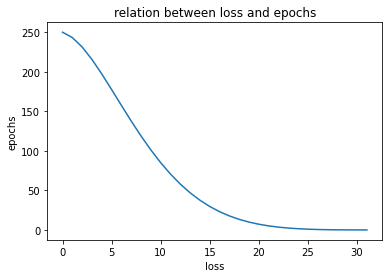

In [54]:
plt.plot(loss)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

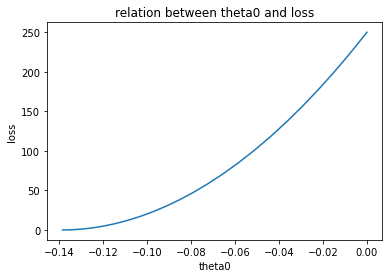

In [55]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

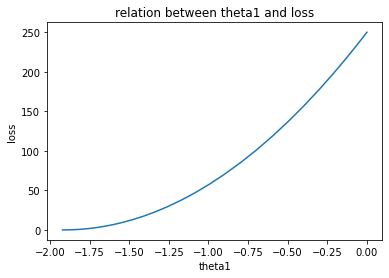

In [57]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

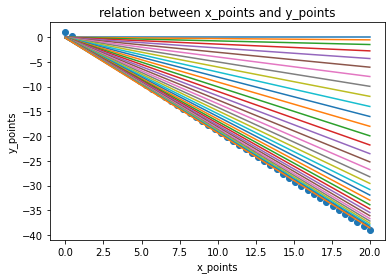

In [58]:
plt.scatter(x_points, y_points)
for i in hyposesis:
    z = np.polyfit(x_points, i, 1)
    p = np.poly1d(z)
    plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

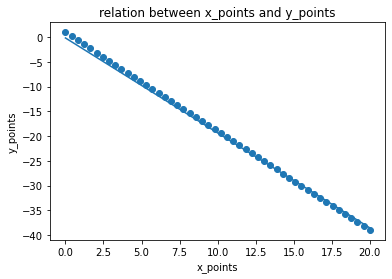

In [59]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

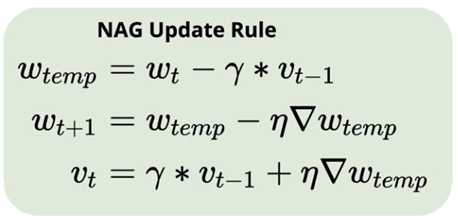

In [60]:
def NAGBatch(x_points, y_points, gamma, learning_rate, maxNumOfIteration):
    m = len(x_points)
    theta = [0,0]
    thetaTemp = [0,0]
    vt = [0,0]
    loss = []
    thetas0 = []
    thetas1 = []
    vts0 = []
    vts1 = []
    thetaTemp0 = []
    thetaTemp1 = []
    GDthetaTemp = [0,0]
    hyposesis = []
    iteration = 1
    numIter = []
    for i in range(maxNumOfIteration):
        print('==================iteration{}==================='.format(iteration))
        thetaTemp[0] = theta[0] - gamma * vt[0]
        thetaTemp[1] = theta[1] - gamma * vt[1]
        thetaTemp0.append(thetaTemp[0])
        thetaTemp1.append(thetaTemp[1])
        hThetaX = np.add(thetaTemp[0], np.multiply(thetaTemp[1], x_points))
        hyposesis.append(hThetaX)
        numIter.append(i)
        #JTheta = (1 / 2 * m) * np.sum(np.power(np.subtract(hThetaX, y_points), 2))
        JTheta = (1 / (2 * m)) * np.sum(np.subtract(hThetaX, y_points) **2)
        loss.append(JTheta)
        GDthetaTemp[0] = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), 1))
        GDthetaTemp[1] = (1 / m) * np.sum(np.multiply(np.subtract(hThetaX, y_points), x_points))
        thetas0.append(theta[0])
        thetas1.append(theta[1])
        theta[0] = thetaTemp[0] - learning_rate * GDthetaTemp[0]
        theta[1] = thetaTemp[1] - learning_rate * GDthetaTemp[1]
        vt[0] = gamma * vt[0] + learning_rate * GDthetaTemp[0]
        vt[1] = gamma * vt[1] + learning_rate * GDthetaTemp[1]
        vts0.append(vt[0])
        vts1.append(vt[1])
        print('error using MSE = ', JTheta)
        print('New Theta = ', theta)
        print('')
        iteration = iteration + 1
        #norm = L2Norm(gradTheta)
        #norm = np.absolute(np.dot(GDTheta0, GDTheta1))
        #norm = np.linalg.norm(GDtheta)
        norm1 = np.linalg.norm(vt)
        optimum = hThetaX
        if i > 0:
            if norm1 < 0.01:
                break
            if np.absolute(loss[i] - loss[i-1]) < 0.01:
                break
#print('loss is: ', loss)
#print('thetas is: ', theta)
    return [thetas0, thetas1, vts0, vts1, thetaTemp0, thetaTemp1, loss, hyposesis, optimum, numIter]

In [61]:
learning_rate = 0.0001
gamma = 0.83
maxNumOfIteration = 1000
thetas0, thetas1, vts0, vts1, thetaTemp0, thetaTemp1, loss, hyposesis, optimum, numIter = NAGBatch(x_points, y_points, gamma, learning_rate, maxNumOfIteration)


==================iteration1===================
error using MSE =  249.88775510204087
New Theta =  [-0.0019, -0.025938775510204085]

==================iteration2===================
error using MSE =  237.66248783973427
New Theta =  [-0.005329184340816327, -0.0727638933456893]

==================iteration3===================
error using MSE =  221.62566189160168
New Theta =  [-0.009962961061810367, -0.13605577045285072]

==================iteration4===================
error using MSE =  203.12932011234687
New Theta =  [-0.015519026812209602, -0.2119728296850711]

==================iteration5===================
error using MSE =  183.32587251592636
New Theta =  [-0.021753564340054647, -0.29719876782439725]

==================iteration6===================
error using MSE =  163.15462455257682
New Theta =  [-0.028457601368637182, -0.388892267113288]

==================iteration7===================
error using MSE =  143.3473226151219
New Theta =  [-0.03545355203562738, -0.48463938844432775

In [62]:
from sklearn.metrics import r2_score
r2_score(y_points, optimum)

0.997494750808924

In [63]:
print('thetas0: ', thetas0)
print('')
print('thetas1: ', thetas1)
print('')
print('vts0: ', vts0)
print('')
print('vts1: ', vts1)
print('')
print('thetaTemp0: ', thetaTemp0)
print('')
print('thetaTemp1: ', thetaTemp1)
print('')
print('loss: ', loss)
print('')
print('hyposesis: ', hyposesis)
print('')
print('optimum: ', optimum)

thetas0:  [0, -0.0019, -0.005329184340816327, -0.009962961061810367, -0.015519026812209602, -0.021753564340054647, -0.028457601368637182, -0.03545355203562738, -0.04259195557097123, -0.04974842140172016, -0.05682078528084673, -0.06372647723792108, -0.0704000990464445, -0.07679120640840921, -0.08286228909212177, -0.08858694075295015, -0.09394820905401434, -0.09893711592716556, -0.1035513373222903, -0.10779403153914217, -0.11167280517991594, -0.115198805866834, -0.11838593110572537, -0.1212501430165727, -0.12380887907155655, -0.12608054945980393, -0.12808411221837346, -0.1298387178161575, -0.13136341543889002, -0.13267691378895066, -0.13379738977463804, -0.1347423390131587, -0.1355284626042777, -0.13617158514317113]

thetas1:  [0, -0.025938775510204085, -0.0727638933456893, -0.13605577045285072, -0.2119728296850711, -0.29719876782439725, -0.388892267113288, -0.48463938844432775, -0.5824088048878301, -0.6805099670206619, -0.7775542352447078, -0.8724189677295972, -0.9642145146505593, -1.05

#### Plot loss vs. epochs

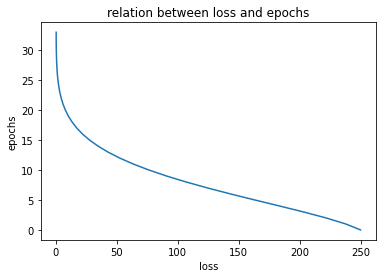

In [64]:
plt.plot(loss, numIter)
plt.title('relation between loss and epochs')
plt.ylabel('epochs')
plt.xlabel('loss')
plt.show()

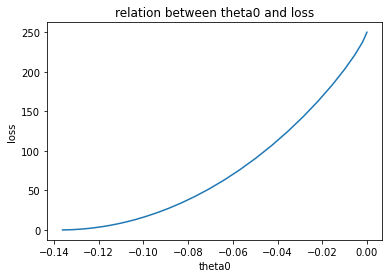

In [65]:
plt.plot(thetas0, loss)
plt.title('relation between theta0 and loss')
plt.ylabel('loss')
plt.xlabel('theta0')
plt.show()

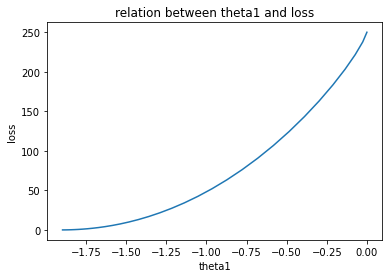

In [66]:
plt.plot(thetas1, loss)
plt.title('relation between theta1 and loss')
plt.ylabel('loss')
plt.xlabel('theta1')
plt.show()

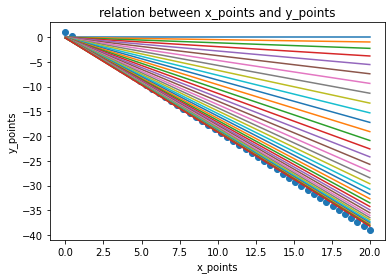

In [67]:
plt.scatter(x_points, y_points)
for i in hyposesis:
    z = np.polyfit(x_points, i, 1)
    p = np.poly1d(z)
    plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

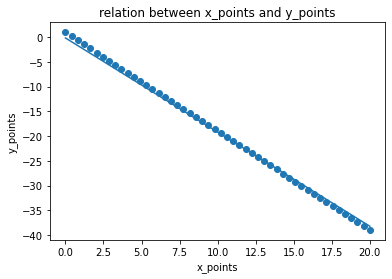

In [68]:
plt.scatter(x_points, y_points)
z = np.polyfit(x_points, optimum, 1)
p = np.poly1d(z)
plt.plot(x_points,p(x_points))
plt.title('relation between x_points and y_points')
plt.ylabel('y_points')
plt.xlabel('x_points')
plt.show()

## Congratulations 
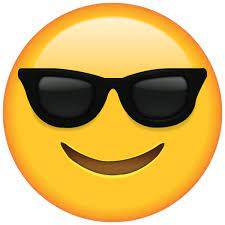